In January 2022, PBSI, Badminton Association of Indonesia, announced 88 names of badminton athletes who will stay in national training center (Pelatnas). Of those 88 names, Praveen Jordan and Melati Daeva Oktavianti, the 2020 All England Mixed Doubles champion are not found on the list.

This was a surprising news as Praveen/Melati has been the number one XD from Indonesia since Owi/Natsir retired. For PBSI to kicked out the world number four ranked XD pair, many questioned why this decision was taken.

In this notebook, we will try to answer that question by analyzing the matches data from 2018 to 2021, scraped from badmintonstatistics.net.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://badmintonstatistics.net/Player?playerid=132046079&year=0&level=all&category=%&round=%&country=%&partner=132040261&rank=%&hand=%&height=%&qualification=%&startdate=1900-01-01&enddate=2100-01-01'
performances = pd.read_html(url)[3]


In [3]:
performances.head(5)

,Tournament,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Best
0,World Championships,-,QF,QF,-,QF,R3,R3,-,R2,-,QF ('14 '15 '17)
1,All England,R2,R2(Q),SF,W,R1,QF,SF,W,R1,QF,W ('16 '20)
2,Indonesia Open,R1,R2,R2,R1,R1,R1,R1,-,R2,R2,R2 ('14 '15 '21 '22)
3,Malaysia Open,SF,QF,R1,R2,R2,R1,R1,-,-,-,SF ('13)
4,Japan Open,QF,R2,R2,-,SF,QF,F,-,-,-,F ('19)


This is Praveen's performances data, how far he was going in each tournament in each year. Note that Praveen used to be partnered with Vita Marissa and Debby Susanto before 2018. So we are going to drop those years, along with 2022 since he is kicked out from Pelatnas in Januari 2022.

In [4]:
performances.drop(['2013','2014','2015','2016','2017','2022','Best'], axis=1, inplace=True)

We are going to count each stages from the same year.

In [5]:
count=performances[['2018', '2019','2020','2021']].apply(pd.Series.value_counts)
count

,2018,2019,2020,2021
-,12.0,9.0,25.0,21.0
F,1.0,4.0,NaN,1.0
Group,NaN,1.0,1.0,1.0
QF,6.0,3.0,1.0,2.0
R1,5.0,4.0,1.0,2.0
R1/F,NaN,NaN,1.0,NaN
R2,3.0,5.0,NaN,2.0
R3,1.0,1.0,NaN,NaN
SF,2.0,1.0,NaN,1.0
W,NaN,2.0,1.0,NaN


In [6]:
performances[(performances['2020']=='R1/F')|(performances['2019']=='Group')]

,Tournament,2018,2019,2020,2021
11,Thailand Open,QF,R2,R1/F,-
25,Season Finals,-,Group,Group,Group


The '-' symbol refers to no result, it's either the tournaments were not held, or they did not participated.

Group refers to group stage in Season Finals--a special event for 8 athletes/pairs in each sectors with most points from that calendar year's event. Praveen/Melati did not get selected for Season Finals in 2018 and only got to group stage in 2019-2021. As the result stay the same (group stage), we are going to drop data from season finals.

Apparently, they held two 2020 Thailand Open tournaments due to COVID. Praveen/Melati reached final stage in one of the two, and only reach round one in the other.

Based on that situation, we are going to clean the data.

In [7]:
count.fillna(0,inplace=True)
count.loc['R1','2020']+=1
count.loc['F','2020']+=1
count.drop(['R1/F','Group'], axis=0,inplace=True)
count.rename(index={'-':'NP'}, inplace=True)
count

,2018,2019,2020,2021
NP,12.0,9.0,25.0,21.0
F,1.0,4.0,1.0,1.0
QF,6.0,3.0,1.0,2.0
R1,5.0,4.0,2.0,2.0
R2,3.0,5.0,0.0,2.0
R3,1.0,1.0,0.0,0.0
SF,2.0,1.0,0.0,1.0
W,0.0,2.0,1.0,0.0


In [8]:
order = [ 'W', 'F', 'SF', 'QF', 'R3', 'R2', 'R1','NP']
count = count.reindex(order).reset_index()
count.rename(columns={'index':'Stage'},inplace=True)
count

,Stage,2018,2019,2020,2021
0,W,0.0,2.0,1.0,0.0
1,F,1.0,4.0,1.0,1.0
2,SF,2.0,1.0,0.0,1.0
3,QF,6.0,3.0,1.0,2.0
4,R3,1.0,1.0,0.0,0.0
5,R2,3.0,5.0,0.0,2.0
6,R1,5.0,4.0,2.0,2.0
7,NP,12.0,9.0,25.0,21.0


Now we are going to plot the performance data to a bar plot.

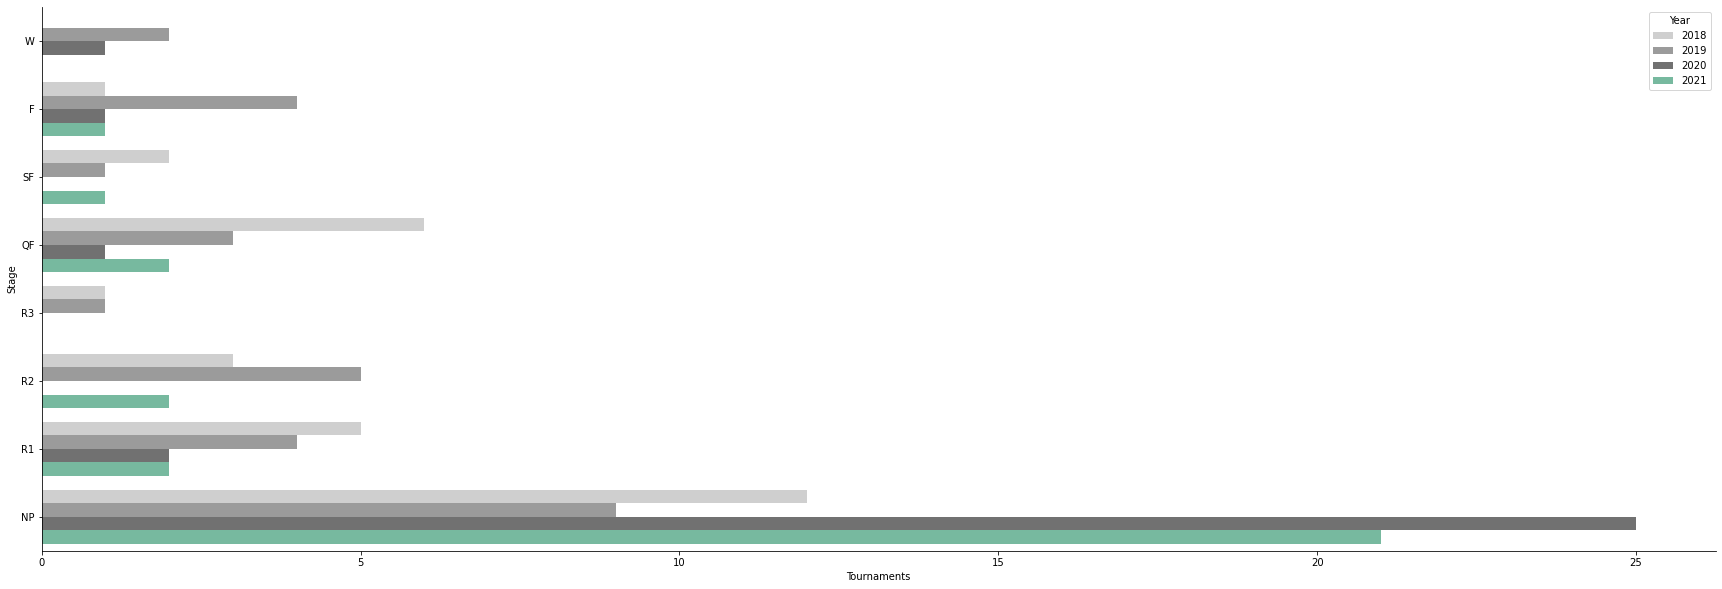

In [9]:
fig, ax1 = plt.subplots(figsize=(30, 10))
tidy = count.melt(id_vars='Stage').rename(columns=str.title)
tidy.rename(columns={'Variable':'Year'},inplace=True)
sns.barplot(y='Stage', x='Value', hue='Year', data=tidy, ax=ax1, palette=[
                 '#CFCFCF','#9B9B9B','#717171','#6CC4A1'])
sns.set_context('paper')
plt.xlabel('Tournaments')
sns.despine(fig)

Based on the plot above, we can see that Praveen/Melati got poorer results in 2021, with no W and less F compared to years before. But since the COVID outbreak, they did not participate in quite a number of tournaments, this also could result in less number of medal they got.

Let's dig the matches data deeper.

In [10]:
url = 'https://badmintonstatistics.net/Player?playerid=132046079&year=-1&level=all&category=%&round=%&country=%&partner=132040261&rank=%&hand=%&height=%&qualification=%&startdate=2018-01-01&enddate=2021-12-31'

matches = pd.read_html(url)[1]


In [11]:
matches.head(5)

,Category,Round,Rank*,Player,Score,Player.1,Rank*.1,Duration
0,World Championships 2021 12/12/2021-19/12/2021,World Championships 2021 12/12/2021-19/12/2021,World Championships 2021 12/12/2021-19/12/2021,World Championships 2021 12/12/2021-19/12/2021,World Championships 2021 12/12/2021-19/12/2021,World Championships 2021 12/12/2021-19/12/2021,World Championships 2021 12/12/2021-19/12/2021,World Championships 2021 12/12/2021-19/12/2021
1,XD,Round 2,23,HOO Pang Ron / CHEAH Yee See,W.O.,Praveen JORDAN / Melati Daeva OKTAVIANTI,5,0
2,Season Finals 2021 1/12/2021-5/12/2021,Season Finals 2021 1/12/2021-5/12/2021,Season Finals 2021 1/12/2021-5/12/2021,Season Finals 2021 1/12/2021-5/12/2021,Season Finals 2021 1/12/2021-5/12/2021,Season Finals 2021 1/12/2021-5/12/2021,Season Finals 2021 1/12/2021-5/12/2021,Season Finals 2021 1/12/2021-5/12/2021
3,XD,Group,2,Dechapol PUAVARANUKROH / Sapsiree TAERATTANACHAI,21-14 / 10-21 / 21-11,Praveen JORDAN / Melati Daeva OKTAVIANTI,5,52
4,XD,Group,5,Praveen JORDAN / Melati Daeva OKTAVIANTI,21-16 / 21-13,Marcus ELLIS / Lauren SMITH,8,33


We are going to clean the data and make it into a more readable format.

In [12]:
import numpy as np
matches['Tournament'] = np.where(np.logical_or(matches['Category']=='XD', matches['Category']=='XD (qual)'), np.nan, matches['Category'])
matches['Tournament'].fillna(method='ffill',inplace=True)
matches = matches[(matches['Category']=='XD')|(matches['Category']=='XD (qual)')]
matches[['Tournament Name','Year','Date']] = matches['Tournament'].str.extract('([\w\s]+)\s+(\d{4})[a-zA-Z\s\(\)]+([\d\/\-]+)')
matches[matches.isna().any(axis=1)]
matches = matches.drop(columns=['Tournament','Category'])

In [13]:
matches.head(5)

,Round,Rank*,Player,Score,Player.1,Rank*.1,Duration,Tournament Name,Year,Date
1,Round 2,23,HOO Pang Ron / CHEAH Yee See,W.O.,Praveen JORDAN / Melati Daeva OKTAVIANTI,5,0,World Championships,2021,12/12/2021-19/12/2021
3,Group,2,Dechapol PUAVARANUKROH / Sapsiree TAERATTANACHAI,21-14 / 10-21 / 21-11,Praveen JORDAN / Melati Daeva OKTAVIANTI,5,52,Season Finals,2021,1/12/2021-5/12/2021
4,Group,5,Praveen JORDAN / Melati Daeva OKTAVIANTI,21-16 / 21-13,Marcus ELLIS / Lauren SMITH,8,33,Season Finals,2021,1/12/2021-5/12/2021
5,Group,7,TANG Chun Man / TSE Ying Suet,21-11 / 21-15,Praveen JORDAN / Melati Daeva OKTAVIANTI,5,30,Season Finals,2021,1/12/2021-5/12/2021
7,Round 1,5,Praveen JORDAN / Melati Daeva OKTAVIANTI,1-0 Ret.,Yujiro NISHIKAWA / Saori OZAKI,104,0,Indonesia Open,2021,23/11/2021-28/11/2021


Looks much better.

Now we are going to create a separated dataframe which only contains the matches data without W.O. As walkover means the match never happened in the first place, whether they win or lose does not reflect their performances.

In [14]:
matchesnowo = matches[~(matches['Score']=='W.O.')]
matchesnowo.head(5)

,Round,Rank*,Player,Score,Player.1,Rank*.1,Duration,Tournament Name,Year,Date
3,Group,2,Dechapol PUAVARANUKROH / Sapsiree TAERATTANACHAI,21-14 / 10-21 / 21-11,Praveen JORDAN / Melati Daeva OKTAVIANTI,5,52,Season Finals,2021,1/12/2021-5/12/2021
4,Group,5,Praveen JORDAN / Melati Daeva OKTAVIANTI,21-16 / 21-13,Marcus ELLIS / Lauren SMITH,8,33,Season Finals,2021,1/12/2021-5/12/2021
5,Group,7,TANG Chun Man / TSE Ying Suet,21-11 / 21-15,Praveen JORDAN / Melati Daeva OKTAVIANTI,5,30,Season Finals,2021,1/12/2021-5/12/2021
7,Round 1,5,Praveen JORDAN / Melati Daeva OKTAVIANTI,1-0 Ret.,Yujiro NISHIKAWA / Saori OZAKI,104,0,Indonesia Open,2021,23/11/2021-28/11/2021
8,Round 2,15,Mathias CHRISTIANSEN / Alexandra BØJE,23-21 / 21-14,Praveen JORDAN / Melati Daeva OKTAVIANTI,5,44,Indonesia Open,2021,23/11/2021-28/11/2021


Now we are going to compare their win/lose each year and calculate the winning rate, while excluding the W.O. matches.

In [15]:
win = {}
lose = {}
years = [2018, 2019, 2020, 2021]
for year in years:
  match = matchesnowo[matchesnowo['Year']==str(year)]
  win[year] = match[match['Player']=='Praveen JORDAN / Melati Daeva OKTAVIANTI'].shape[0]
  lose[year] = match[match['Player.1']=='Praveen JORDAN / Melati Daeva OKTAVIANTI'].shape[0]

In [16]:
wnl = pd.Series(win).to_frame('Win').join(pd.Series(lose).to_frame('Lose'))
wnl['WinRate'] = wnl['Win']/(wnl['Win']+wnl['Lose'])
wnl.style.format({'WinRate': "{:.2%}"})

,Win,Lose,WinRate
2018,25,17,59.52%
2019,45,22,67.16%
2020,6,2,75.00%
2021,20,14,58.82%


In [17]:
wnl.reset_index(inplace=True)
wnl.rename(columns={'index':'Year'},inplace=True)
wnl['Year'] = wnl['Year'].astype(str)

C:\Users\Risa\AppData\Local\Temp\ipykernel_2848\4144961286.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


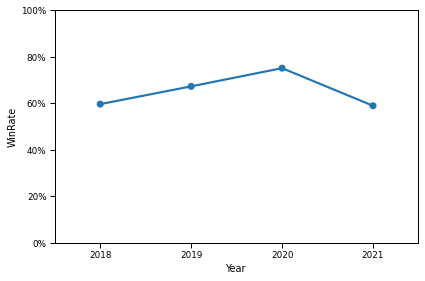

In [18]:
plt.ylim(0,1)
sns.pointplot(data=wnl,x='Year',y='WinRate')
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.tight_layout()
plt.show()

The performances in 2021, winning-rate wise is in fact worse than any other year. But we have to keep in mind that there are a lot of factors why the athletes fail to meet expectations during the match, like their own health conditions, the hall, and so on. And it is actually normal for athletes to have ups and downs during their career.

Let's focus on 2021 matches compared to matches before 2021. We are going to break down the opponents to several categories and count the win rate of each categories respectively.

In [19]:
matchesnowo.dtypes

Round              object
Rank*              object
Player             object
Score              object
Player.1           object
Rank*.1            object
Duration           object
Tournament Name    object
Year               object
Date               object
dtype: object

In [20]:
matchesnowo['Period']=np.where(matchesnowo['Year']=='2021','2021','Before')
matchesnowo['Result']=np.where(matchesnowo['Player']=='Praveen JORDAN / Melati Daeva OKTAVIANTI','Win', 'Lose')


matchesnowo.loc[matchesnowo['Rank*.1'] == '-','Rank*.1'] = 999
matchesnowo.loc[matchesnowo['Rank*'] == '-','Rank*'] = 999

matchesnowo['Rank*.1'] = matchesnowo['Rank*.1'].astype(int)
matchesnowo['Rank*'] = matchesnowo['Rank*'].astype(int)

matchesnowo['RankOp'] = np.where(matchesnowo['Result']=='Win',matchesnowo['Rank*.1'],matchesnowo['Rank*'])
matchesnowo['Rank'] = pd.cut(matchesnowo['RankOp'], bins=[0,10,32,100,10000], labels=["Top 10", "Top 32", "Top 100", "Outside Top 100"], ordered=True)


C:\Users\Risa\AppData\Local\Temp\ipykernel_2848\1327081448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchesnowo['Period']=np.where(matchesnowo['Year']=='2021','2021','Before')
C:\Users\Risa\AppData\Local\Temp\ipykernel_2848\1327081448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchesnowo['Result']=np.where(matchesnowo['Player']=='Praveen JORDAN / Melati Daeva OKTAVIANTI','Win', 'Lose')
C:\Users\Risa\AppData\Local\Temp\ipykernel_2848\1327081448.py:8: SettingWithCopyWarning: 
A value is t

In [21]:
matchesnowo.head()

,Round,Rank*,Player,Score,Player.1,Rank*.1,Duration,Tournament Name,Year,Date,Period,Result,RankOp,Rank
3,Group,2,Dechapol PUAVARANUKROH / Sapsiree TAERATTANACHAI,21-14 / 10-21 / 21-11,Praveen JORDAN / Melati Daeva OKTAVIANTI,5,52,Season Finals,2021,1/12/2021-5/12/2021,2021,Lose,2,Top 10
4,Group,5,Praveen JORDAN / Melati Daeva OKTAVIANTI,21-16 / 21-13,Marcus ELLIS / Lauren SMITH,8,33,Season Finals,2021,1/12/2021-5/12/2021,2021,Win,8,Top 10
5,Group,7,TANG Chun Man / TSE Ying Suet,21-11 / 21-15,Praveen JORDAN / Melati Daeva OKTAVIANTI,5,30,Season Finals,2021,1/12/2021-5/12/2021,2021,Lose,7,Top 10
7,Round 1,5,Praveen JORDAN / Melati Daeva OKTAVIANTI,1-0 Ret.,Yujiro NISHIKAWA / Saori OZAKI,104,0,Indonesia Open,2021,23/11/2021-28/11/2021,2021,Win,104,Outside Top 100
8,Round 2,15,Mathias CHRISTIANSEN / Alexandra BØJE,23-21 / 21-14,Praveen JORDAN / Melati Daeva OKTAVIANTI,5,44,Indonesia Open,2021,23/11/2021-28/11/2021,2021,Lose,15,Top 32


In [22]:
table = pd.pivot_table(matchesnowo, values='Round', index=['Rank'],
                       columns=['Period','Result'], aggfunc='count')
table

Period          2021     Before    
Result          Lose Win   Lose Win
Rank                               
Top 10            10   2     25  21
Top 32             3   7     10  20
Top 100            0   6      5  23
Outside Top 100    1   5      1  12

Praveen/Melati is in top 10, the winning ratio used to be 21:25 before 2021, they can go against top 10, almost equal. But in 2021, the gap is widen. Out of 12 matches against the top 10, they only won 2 matches.

In [23]:
matchesnowo[(matchesnowo['Year']=='2021')&(matchesnowo['Result']=='Lose')].Player.value_counts()

Dechapol PUAVARANUKROH / Sapsiree TAERATTANACHAI    5
TANG Chun Man / TSE Ying Suet                       2
Mathias CHRISTIANSEN / Alexandra BØJE               1
DHRUV KAPILA / REDDY N. Sikki                       1
HOO Pang Ron / CHEAH Yee See                        1
Yuta WATANABE / Arisa HIGASHINO                     1
ZHENG Siwei / HUANG Yaqiong                         1
SEO Seung Jae / CHAE YuJung                         1
Thom GICQUEL / Delphine DELRUE                      1
Name: Player, dtype: int64

In [24]:
matchesnowo['Opponent']=np.where(matchesnowo['Result']=='Win', matchesnowo['Player.1'], matchesnowo['Player'])

C:\Users\Risa\AppData\Local\Temp\ipykernel_2848\4139116183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchesnowo['Opponent']=np.where(matchesnowo['Result']=='Win', matchesnowo['Player.1'], matchesnowo['Player'])


In [25]:
h2h = pd.pivot_table(matchesnowo, values='Round', index=['Opponent'],
                       columns=['Period','Result'], aggfunc='count')
h2h.reset_index().sort_values(by=('2021','Lose'),ascending=False).head(9)

Period                                          Opponent 2021      Before     
Result                                                   Lose  Win   Lose  Win
9       Dechapol PUAVARANUKROH / Sapsiree TAERATTANACHAI  5.0  NaN    2.0  4.0
55                         TANG Chun Man / TSE Ying Suet  2.0  NaN    2.0  1.0
8                          DHRUV KAPILA / REDDY N. Sikki  1.0  NaN    NaN  NaN
16                          HOO Pang Ron / CHEAH Yee See  1.0  NaN    NaN  NaN
29                 Mathias CHRISTIANSEN / Alexandra BØJE  1.0  2.0    NaN  1.0
48                           SEO Seung Jae / CHAE YuJung  1.0  NaN    1.0  NaN
58                        Thom GICQUEL / Delphine DELRUE  1.0  1.0    1.0  NaN
70                       Yuta WATANABE / Arisa HIGASHINO  1.0  NaN    2.0  2.0
71                           ZHENG Siwei / HUANG Yaqiong  1.0  NaN    7.0  2.0

Out of all pairs that won against Praveen/Melati in 2021, Dechapol/Sapsiree is the pair with most wins again Praveen/Melati. Ironically, their H2H before 2021 is 2-4 agains Praveen/Melati, which means they were more likely to lose againts the Indonesian pair. It's either Dechapol/Sapsiree improved their game dramatically or Praveen/Melati performed poorly against them in 2021.

Conclusion: Though there's a room to argue whether they deserve to stay in Pelatnas or not, we can say that statistically, Praveen/Melati's performance in 2021 is no doubt worse than their performance during 2018-2020, based on the declined winning rate, worsen tournament result, or match against players who used to be on par with them.